In [40]:
%matplotlib inline
import os          
import joblib    
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, accuracy_score

In [41]:
print("Current Working Dir:", os.getcwd())

## collect data     
data_path = '../datasets/Housing.csv'

df = pd.read_csv (data_path, thousands = ',')

Current Working Dir: c:\Users\topol\Hands-On-Machine-Learning-Projects\ML-Project-1


In [42]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [43]:
df.shape

(20640, 10)

In [44]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [45]:
df.describe ()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [46]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

#### Ocean proximity column is propably our catagorical attribute, since is repetitive

In [47]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [48]:
housing = df.copy()

#### convert this catagorical attribute into simple numeric:
#### `<1H OCEAN == 0`, `INLAND == 1`, `NEAR OCEAN == 2`, `NEAR BAY == 3`, `ISLAND == 4` 

In [49]:
housing['ocean_proximity'] = housing['ocean_proximity'].apply(lambda x: 
                                                    0 if x == '<1H OCEAN' else 
                                                    1 if x == 'INLAND' else 
                                                    2 if x == 'NEAR OCEAN' else 
                                                    3 if x == 'NEAR BAY' 
                                                    else 4)

In [50]:
housing['ocean_proximity'].value_counts()

ocean_proximity
0    9136
1    6551
2    2658
3    2290
4       5
Name: count, dtype: int64

In [51]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [52]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity         int64
dtype: object

In [53]:
## check missing values

In [54]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [55]:
## total beds got a lot of missing values
housing.isna().mean()

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [56]:
## drop total_bedrooms column
housing = housing.drop('total_bedrooms', axis= 1)


In [57]:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [58]:
## Look at the correlations between every pair of attributes using corr()
corr_matrix = housing.corr()
sorted_corr = corr_matrix['median_house_value'].sort_values(ascending= False)
print(sorted_corr)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
ocean_proximity       0.021732
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


#### Data Visualization to understand and gain insights about data

### Plots

<Axes: >

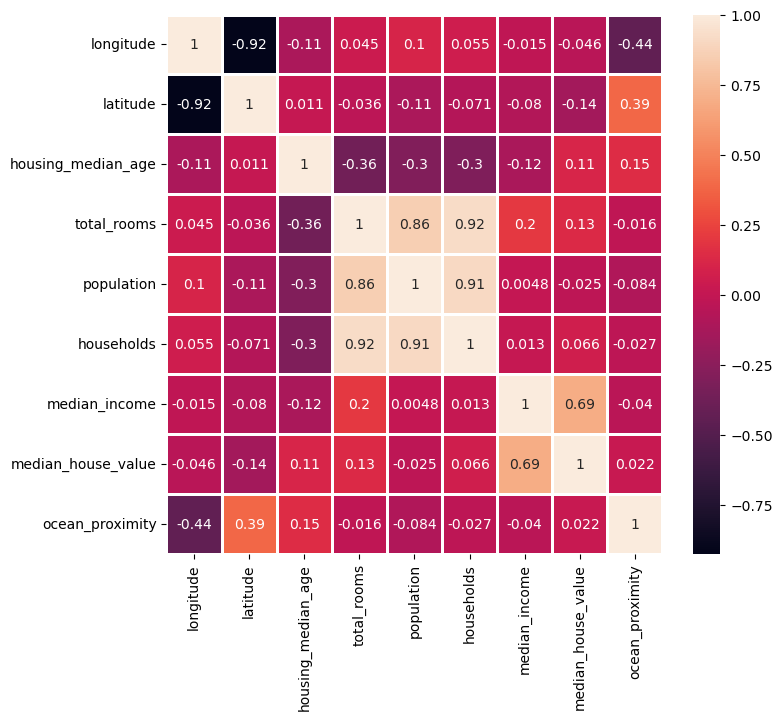

In [59]:
plt.figure(figsize= (8,7))
sns.heatmap(housing.corr(numeric_only= True),annot= True,linewidths= 2)

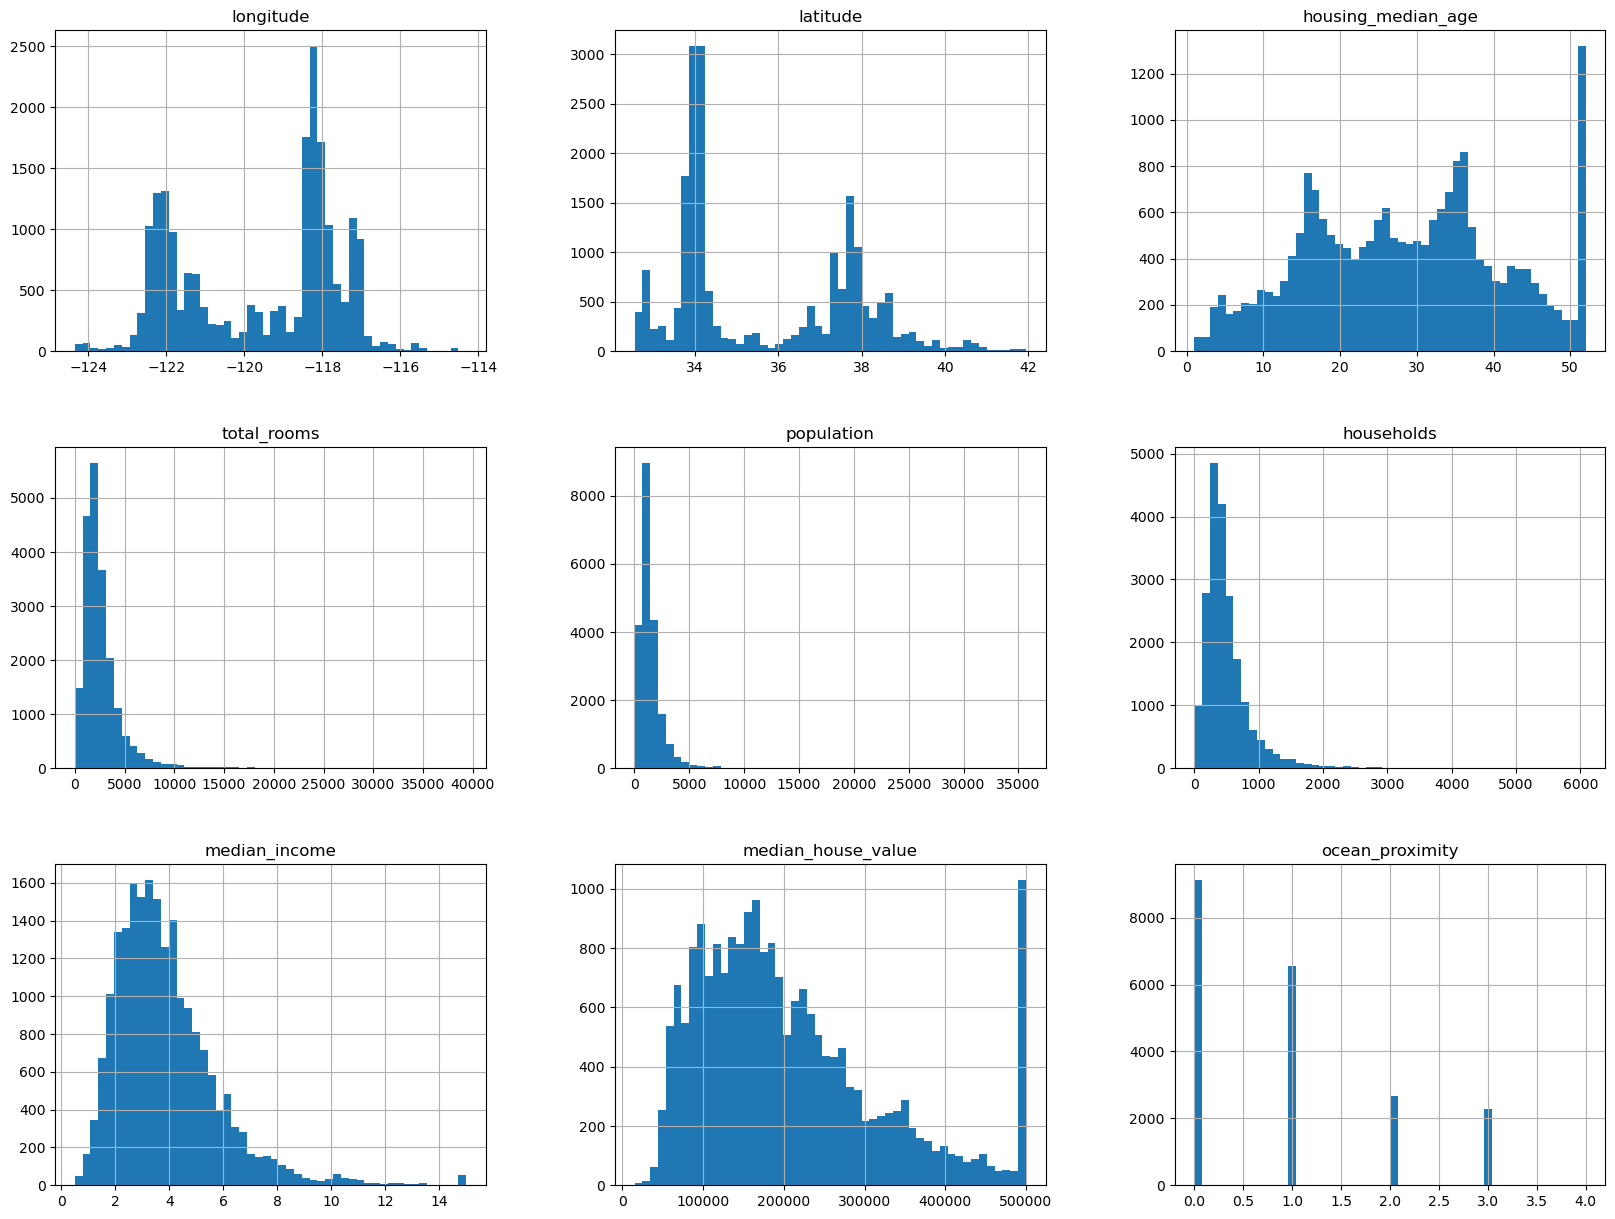

In [60]:
## plot all atributes
housing.hist(bins= 50, figsize= (20, 15))


plt.show ()

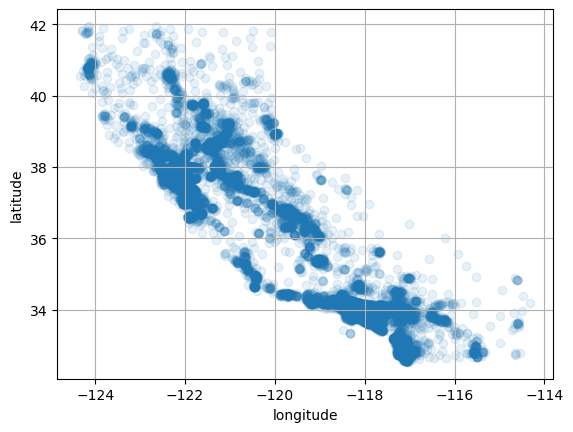

In [61]:
## lets look at geographical information
plt.scatter(housing['longitude'], housing['latitude'], alpha= 0.1)   # alpha for transparency to see better the density
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.grid()

plt.show()

#### lets look at prices

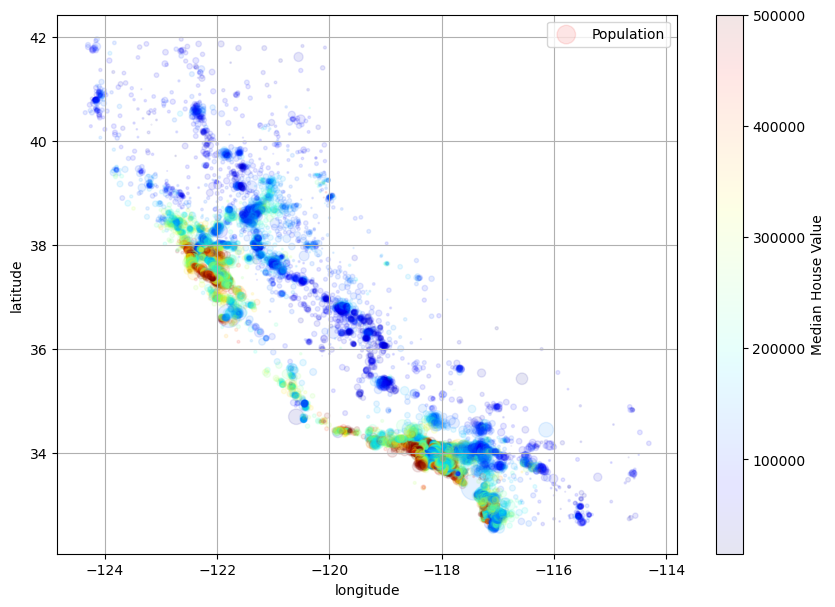

In [62]:
## colormap option cmap - jet to represents the price: blue(low) and red(high prices)
plt.figure(figsize= (10,7))
plt.scatter(housing['longitude'], housing['latitude'], alpha= 0.1,
            s= housing['population']/100, label= 'population', 
            c= housing['median_house_value'], 
            cmap= 'jet')  
              
# add colorbar
plt.colorbar(label='Median House Value')        
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.grid()
plt.legend(['Population'], loc='upper right')

plt.show()

#### Now lets create a Test and trainning sets

In [63]:
X = housing.drop('median_house_value', axis= 1)
y = housing['median_house_value']

In [64]:
y = pd.DataFrame(y)
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [65]:
X

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,3
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,1
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,1
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,1
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,1


In [66]:
## split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512, 1), (4128, 1))

In [68]:
## scalling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Model selection and Training

In [69]:
## a model selection and training the model
model = LinearRegression()

try:
    model.fit(X_train_scaled, y_train)
    print('Model Trained successfully')

except Exception as e:
    print(f'The Model failed to train: {e}')    

Model Trained successfully


#### Model Evaluation

In [70]:
# Predictions
some_labels = y_test.values                              # Actual values 
y_pred = model.predict(X_test_scaled)                    # Predicted values

# Print predictions and actual labels side by side
print(f'Actual:\n\n {some_labels}\n')
print(f'Predicted: \n\n {y_pred}')

Actual:

 [[ 47700.]
 [ 45800.]
 [500001.]
 ...
 [500001.]
 [ 72300.]
 [151500.]]

Predicted: 

 [[ 58379.8188444 ]
 [178861.35510779]
 [317774.61081261]
 ...
 [445714.96627279]
 [138317.29705824]
 [174358.33317306]]


In [71]:
# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)              
rmse = root_mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)                          

print('Linear Model Performance:')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Linear Model Performance:
Mean Squared Error (MSE): 4976995725.035908
Root Mean Squared Error (RMSE): 70547.82579949511
R-squared (R²): 0.6201952361684019


#### We can try Random forest regressor to compare the score

In [72]:
## Random forest model
forest_model = RandomForestRegressor(n_estimators= 100, random_state= 41)

try: 
    forest_model.fit(X_train_scaled, y_train)
    print('The model trained successfully')
except Exception as e:
    print(f'The model failed the train: {e}')    

The model trained successfully


In [73]:
# predictions
forest_pred = forest_model.predict(X_test_scaled)

print(f'Actual: \n\n {some_labels} \n')
print(f'Predicted: \n\n {forest_pred}')

Actual: 

 [[ 47700.]
 [ 45800.]
 [500001.]
 ...
 [500001.]
 [ 72300.]
 [151500.]] 

Predicted: 

 [ 51701.    70781.   477701.55 ... 497018.96  69269.   172572.  ]


In [74]:
import warnings
from sklearn.exceptions import DataConversionWarning

# Ignore all warnings of type DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [75]:
# Calculate regression metrics
forest_rmse_scores = cross_val_score(forest_model, X_train_scaled, y_train,
                                     scoring= 'neg_mean_squared_error', cv= 10)

forest_rmse_scores = np.sqrt(-forest_rmse_scores)
# Display the scores
print(f'Scores: {forest_rmse_scores}')

Scores: [48491.35890238 50699.03611649 48457.44605554 50468.96321589
 51380.57931873 47416.15996111 46172.88268726 51320.48091153
 50425.28869071 49841.64830976]


In [76]:
forest_r2 = r2_score(y_test, forest_pred)
#accuracy = accuracy_score(y_test, forest_pred)

# Display the scores
print(f'Scores: {forest_rmse_scores}\n')
#print(f'Accuracy {accuracy}\n')
print(f'R2 score: {forest_r2}')

Scores: [48491.35890238 50699.03611649 48457.44605554 50468.96321589
 51380.57931873 47416.15996111 46172.88268726 51320.48091153
 50425.28869071 49841.64830976]

R2 score: 0.8117197093980626


#### Great! the random forest is perfoming way better than the linear model

**Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

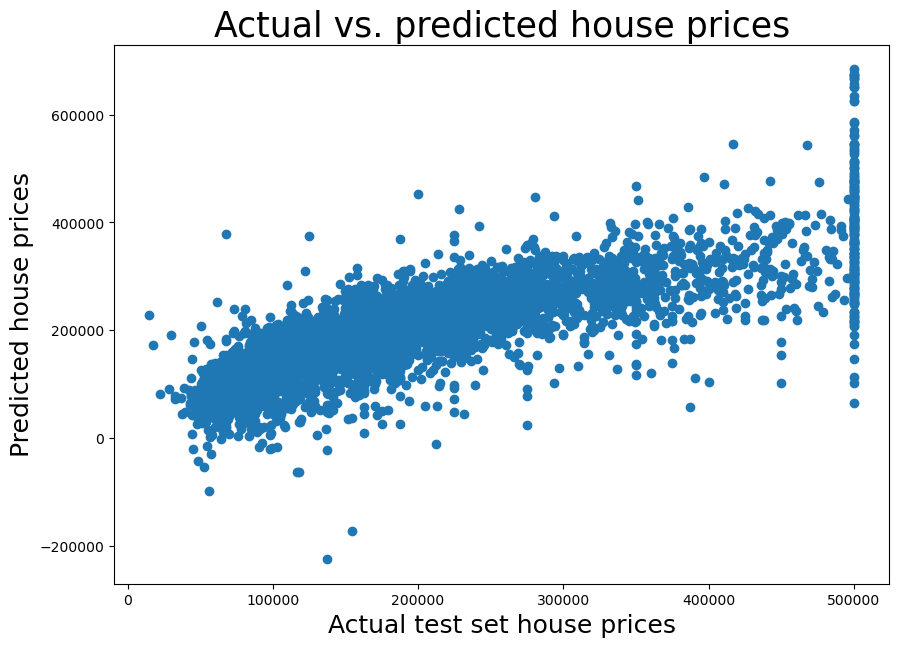

In [77]:
plt.figure(figsize= (10,7))
plt.scatter(x= y_test, y= y_pred)
plt.title("Actual vs. predicted house prices",fontsize= 25)
plt.xlabel("Actual test set house prices",fontsize= 18)
plt.ylabel("Predicted house prices", fontsize= 18)

plt.show()

In [78]:
## We can eaily save the model using the joblib 
#joblib.dump(forest_model, 'forest_model.pkl')